
<img src=https://static.casadomo.com/media/2020/02/lonmark-espana-universidad-valencia-jornada-automatizacion.png width="300">


# Aprendizaje máquina II: Mapas Autoorganizados

Yolanda Vives Gilabert

# Ejercicios Sesión 1

## Ejercicio 1. Representa el ratio de aprendizaje (learning rate) en función del número de épocas para diferentes ratios de decrecimiento.

1.1 - Representa 3 gráficas con el ratio de aprendizaje (learning rate) en función del número de epochs (entre 1 y 50) para 3 valores de ratios de decrecimiento ($\lambda=[0.1, 0.5, 0.99]$) y contesta a las preguntas.  

Recuerda la fórmula del "learning rate": $\eta_t = \eta_0 e^{(-t*\lambda)}$

Siendo $t$ la época y $\lambda$ el ratio de decrecimiento. Consideraremos $\eta_0=1$.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

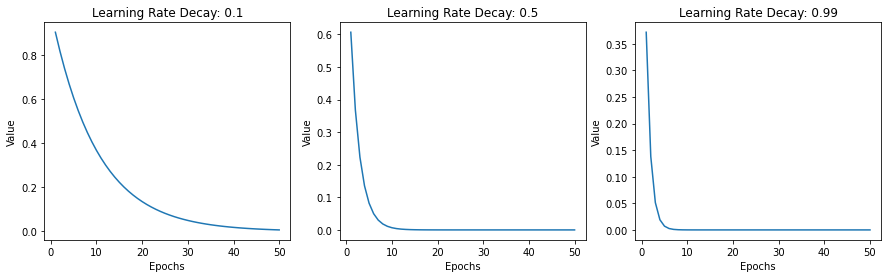

In [8]:
epochs = np.array(range(1,51))
lr_decay = [0.1,0.5,0.99]
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
data = []

for lr in lr_decay:
    data.append(np.exp(-lr*epochs))

for i in range(3):
    ax[i].plot(epochs, data[i])
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel("Value")
    ax[i].set_title("Learning Rate Decay: {}".format(lr_decay[i]))

plt.show()

1.2.- Explica qué ocurre con la actualización de los pesos vecinos al BMU en las 3 situaciones anteriores. Ten en cuenta la fórmula:

$\Delta\omega_t=\eta_t  f(g,h,\sigma_t) (x-\omega_t)$

siendo

- $t$ época $\newline$
- $(g,h)$ coordenadas del BMU $\newline$
- $\eta$ learning rate $\newline$
- $\sigma$ radio $\newline$
- $f(g,h,\sigma_t)$ función de vecindad

#### Respuesta:

Con un decay_rate muy alto con pocas epochs llegamos a 0 y entonces dejamos de actualizar los pesos. Si en cambio utilizamos un decay_rate bajo entonces se actualizarán los pesos mucho más durante más epochs.

## Ejercicio 2. Representa la función de vecindad (neighborhood distance function) en función de la distancia euclídea. 

2.1 Representa 3 gráficas con la función de vecindad (neighborhood distance function) en función de la distancia euclídea (entre 0 y 50) para 3 valores de radio diferentes ($\sigma^2=[1, 10, 100]$).

Recuerda la fórmula de la "neigborhood distance function": $f(g,h,\sigma_t) = e^{\frac{-d((i,i),(g,h))^2}{2\sigma^2}}$

Siendo $-d((i,i),(g,h))^2$ la distancia euclídea entre la neurona BMU y la vecina y $\sigma$ el radio.

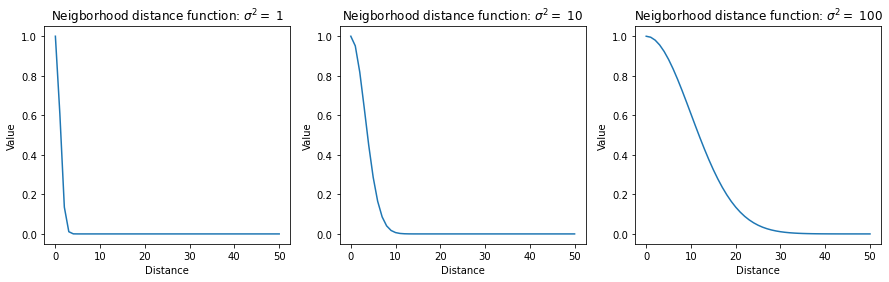

In [17]:
distance = np.array(range(0,51))
sigma_sq = [1,10,100]
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

data = []

for s in sigma_sq:
    data.append(np.exp((-distance**2)/(2*s)))

for i in range(3):
    ax[i].plot(distance, data[i])
    ax[i].set_xlabel("Distance")
    ax[i].set_ylabel("Value")
    ax[i].set_title("Neigborhood distance function: $\sigma^2=$ {}".format(sigma_sq[i]))

2.2 Explica qué ocurre con la actualización de los pesos vecinos al BMU en las 3 situaciones anteriores. Ten en cuenta la fórmula del ejercicio 1.2.

#### Respuesta:

Si aumentamos el radio entonces se actualizan más vecinos.

## Ejercicio 3. Programar el SOM. 

Intenta entender qué hace el código siguiente y complétalo:

1.- Función que devuelve la neurona BMU.

In [91]:
# Devuelve los índices (g,h) del BMU
def encontrar_BMU(SOM,x):
    #--------------------------------
    
    distSq = (np.sum(SOM[:,:,:]-x[np.newaxis, np.newaxis,:],axis=2))**2
    
    #--------------------------------
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)

2.- Función que actualiza el BMU y los vecinos. El parámetro `step`especifica el número máximo de celdas a la izquierda, derecha, arriba y abajo que se pueden cambiar cuando se hace una actualización.

In [87]:
# Actualiza los pesos del SOM 
def actualizar_pesos(SOM, train_ex, learn_rate, radius_sq, 
                   BMU_coord, step=3):
    g, h = BMU_coord
    #si el radio es próximo a 0, actualiza únicamente el BMU (f=1)
    if radius_sq < 1e-3:
        #------------------------------------------------
        SOM[BMU_coord,:] += learn_rate * (train_ex-SOM[BMU_coord,:])
        #------------------------------------------------
        return SOM
    # actualizar todas las celdas en el vecindario del BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            #---------------------------------------------------
            dist_func = np.exp(-dist_sq/(2*radius_sq))
            #---------------------------------------------------
            SOM[i,j,:] += learn_rate * dist_func * (train_ex-SOM[i,j,:])   
    return SOM    

3.- Función para entrenar un SOM

In [64]:
# Función para entrenar el SOM. Requiere la inicialización de la rejilla o bien una rejilla parcialmente entrenada como 
# parámetro.

import random as rand

def entrenar_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, 
             lr_decay = .1, radius_decay = .1, epochs = 10):    
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            #--------------------------------------------
            
            BMU_coord = encontrar_BMU(SOM,train_ex)

            SOM = actualizar_pesos(SOM, train_ex, learn_rate, radius_sq, BMU_coord, step=3)

            #--------------------------------------------
        # Actualizar learning rate y radio 
        #--------------------------------------------
        learn_rate = learn_rate_0 * np.exp(-epoch*lr_decay) 
        radius_sq = radius_0 * np.exp(-epoch*radius_decay)
            
        #--------------------------------------------
        
    return SOM

## Ejercicio 4. Entrenar un SOM. 

Entrena un SOM que ordene colores inicializados aleatoriamente. Para entrenar la red utiliza 1, 5 y 10 épocas y representa el resultado. Puedes dejar los valores por defecto de `learn_rate`, `radius_sq`, `lr_decay` y el `radius_decay`.

(3000, 3)


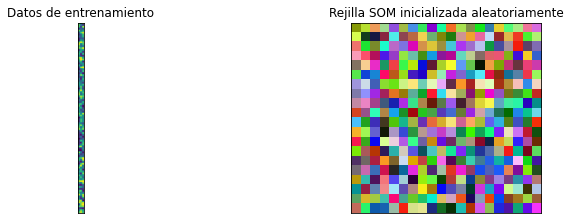

In [72]:
# Dimensiones del grid SOM
m = 20
n = 20
# Número de ejemplos para entrenamiento
n_x = 3000
rand = np.random.RandomState(0)
# Inicializa el dataset de entrenamiento
train_data = rand.randint(0, 255, (n_x, 3))
print(train_data.shape)
# Inicializa la SOM aleatoriamente
SOM = rand.randint(0, 255, (m, n, 3)).astype(float)
# Representa la matriz de entrenamiento y el SOM 
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data[1:100]) 
ax[0].title.set_text('Datos de entrenamiento')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Rejilla SOM inicializada aleatoriamente')

(7, 6)
(5, 4)
(14, 6)
(11, 12)
(12, 10)
(8, 6)
(14, 5)
(11, 8)
(15, 6)
(13, 1)
(11, 5)
(9, 6)
(14, 2)
(10, 13)
(10, 6)
(12, 12)
(14, 7)
(12, 10)
(17, 8)
(16, 2)
(17, 2)
(11, 12)
(15, 5)
(15, 6)
(14, 6)
(16, 10)
(6, 4)
(5, 8)
(15, 11)
(11, 12)
(8, 6)
(9, 6)
(16, 1)
(17, 2)
(15, 1)
(10, 13)
(16, 3)
(15, 9)
(16, 1)
(6, 11)
(16, 10)
(14, 3)
(13, 13)
(11, 10)
(14, 8)
(16, 3)
(11, 4)
(8, 9)
(9, 7)
(15, 11)
(16, 2)
(11, 6)
(16, 3)
(12, 12)
(9, 7)
(6, 7)
(11, 3)
(9, 7)
(14, 9)
(16, 7)
(17, 6)
(4, 6)
(10, 6)
(10, 1)
(17, 2)
(9, 8)
(17, 3)
(13, 6)
(10, 1)
(10, 9)
(5, 3)
(8, 6)
(16, 4)
(5, 4)
(7, 11)
(11, 7)
(11, 3)
(13, 13)
(8, 13)
(17, 2)
(6, 5)
(10, 8)
(15, 2)
(17, 7)
(10, 12)
(8, 6)
(6, 12)
(6, 4)
(6, 8)
(7, 9)
(8, 4)
(11, 6)
(13, 8)
(8, 1)
(17, 6)
(9, 2)
(17, 3)
(13, 6)
(17, 6)
(7, 2)
(7, 8)
(7, 2)
(10, 6)
(6, 9)
(10, 4)
(8, 11)
(7, 4)
(10, 5)
(16, 10)
(16, 5)
(6, 8)
(8, 8)
(5, 2)
(8, 1)
(14, 9)
(12, 13)
(8, 7)
(6, 11)
(10, 12)
(14, 4)
(5, 11)
(14, 7)
(11, 11)
(10, 4)
(6, 12)
(6, 6)
(9, 10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(16, 4)
(15, 3)
(13, 7)
(12, 0)
(7, 5)
(12, 11)
(13, 6)
(16, 8)
(18, 7)
(7, 12)
(15, 9)
(17, 2)
(4, 10)
(11, 7)
(14, 0)
(15, 2)
(12, 4)
(13, 9)
(5, 3)
(12, 3)
(10, 6)
(13, 6)
(15, 5)
(16, 9)
(10, 2)
(12, 2)
(7, 12)
(16, 1)
(13, 5)
(12, 11)
(9, 9)
(15, 7)
(14, 11)
(10, 3)
(13, 4)
(17, 3)
(7, 13)
(6, 2)
(9, 9)
(13, 1)
(14, 4)
(16, 9)
(17, 6)
(15, 9)
(12, 2)
(12, 2)
(14, 3)
(14, 0)
(13, 9)
(5, 2)
(9, 6)
(14, 0)
(14, 2)
(12, 13)
(16, 9)
(11, 8)
(11, 11)
(9, 2)
(17, 7)
(14, 6)
(14, 0)
(16, 1)
(12, 3)
(6, 12)
(6, 10)
(16, 1)
(10, 11)
(15, 3)
(18, 6)
(14, 4)
(10, 7)
(5, 11)
(8, 8)
(14, 8)
(16, 5)
(12, 13)
(5, 5)
(14, 6)
(4, 9)
(18, 5)
(15, 6)
(8, 3)
(15, 3)
(4, 4)
(11, 8)
(4, 4)
(9, 0)
(7, 6)
(11, 1)
(15, 4)
(11, 8)
(4, 6)
(15, 2)
(14, 3)
(16, 3)
(14, 0)
(15, 6)
(14, 6)
(14, 3)
(8, 5)
(14, 0)
(5, 11)
(12, 2)
(9, 0)
(7, 7)
(8, 5)
(15, 2)
(11, 11)
(7, 2)
(13, 4)
(6, 12)
(9, 7)
(4, 10)
(6, 11)
(10, 11)
(15, 6)
(8, 11)
(16, 1)
(12, 2)
(7, 2)
(7, 10)
(16, 9)
(15, 8)
(14, 4)
(6, 7)
(14, 4)
(7, 6)
(

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(14, 4)
(7, 0)
(10, 12)
(11, 7)
(18, 2)
(7, 0)
(13, 5)
(17, 3)
(18, 9)
(7, 11)
(15, 2)
(14, 8)
(16, 2)
(17, 6)
(17, 6)
(11, 1)
(17, 3)
(17, 2)
(6, 2)
(18, 6)
(6, 3)
(18, 8)
(11, 5)
(11, 7)
(5, 3)
(12, 10)
(17, 6)
(10, 0)
(9, 2)
(12, 10)
(8, 7)
(18, 9)
(13, 10)
(17, 9)
(17, 3)
(5, 3)
(10, 7)
(13, 7)
(9, 0)
(17, 9)
(14, 12)
(14, 9)
(7, 4)
(16, 8)
(15, 12)
(7, 0)
(17, 3)
(12, 0)
(12, 11)
(15, 11)
(17, 9)
(7, 0)
(10, 10)
(7, 5)
(12, 12)
(6, 7)
(12, 12)
(12, 10)
(8, 5)
(18, 8)
(10, 1)
(7, 0)
(15, 10)
(10, 4)
(12, 3)
(13, 9)
(9, 4)
(12, 2)
(6, 4)
(18, 2)
(9, 2)
(7, 1)
(9, 0)
(6, 10)
(8, 4)
(6, 3)
(8, 4)
(14, 10)
(13, 11)
(12, 9)
(18, 8)
(7, 0)
(14, 8)
(8, 3)
(10, 5)
(8, 13)
(11, 6)
(9, 7)
(6, 10)
(13, 2)
(7, 12)
(14, 2)
(12, 1)
(5, 5)
(15, 9)
(12, 6)
(11, 5)
(11, 0)
(15, 7)
(13, 5)
(14, 9)
(12, 1)
(16, 2)
(15, 4)
(5, 11)
(18, 8)
(11, 11)
(4, 10)
(9, 2)
(9, 4)
(7, 6)
(9, 6)
(11, 0)
(17, 2)
(11, 5)
(18, 5)
(5, 5)
(15, 10)
(7, 12)
(6, 3)
(7, 5)
(18, 2)
(9, 4)
(15, 0)
(18, 2)
(11, 5)
(10, 2)
(8,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(9, 8)
(8, 10)
(12, 9)
(10, 8)
(7, 6)
(13, 2)
(9, 4)
(12, 3)
(17, 7)
(5, 10)
(6, 10)
(10, 12)
(6, 11)
(3, 2)
(10, 11)
(10, 8)
(5, 9)
(12, 7)
(3, 9)
(10, 5)
(11, 10)
(19, 5)
(12, 6)
(13, 14)
(6, 10)
(13, 10)
(19, 6)
(11, 13)
(10, 7)
(3, 2)
(9, 7)
(7, 6)
(13, 6)
(3, 8)
(7, 10)
(12, 12)
(10, 1)
(17, 3)
(10, 12)
(5, 10)
(10, 10)
(3, 8)
(6, 6)
(5, 6)
(3, 2)
(10, 7)
(16, 8)
(10, 7)
(10, 12)
(14, 11)
(5, 12)
(18, 8)
(7, 11)
(12, 3)
(10, 10)
(9, 5)
(15, 3)
(8, 9)
(6, 11)
(17, 9)
(3, 10)
(8, 9)
(16, 0)
(14, 12)
(8, 13)
(12, 7)
(11, 4)
(9, 9)
(5, 9)
(9, 8)
(4, 4)
(16, 2)
(9, 11)
(14, 8)
(17, 6)
(3, 5)
(19, 4)
(6, 4)
(14, 5)
(4, 11)
(8, 9)
(7, 11)
(15, 13)
(6, 4)
(18, 4)
(17, 3)
(16, 7)
(5, 9)
(19, 7)
(11, 7)
(6, 1)
(6, 13)
(11, 11)
(17, 2)
(6, 2)
(15, 7)
(10, 14)
(8, 10)
(16, 2)
(7, 13)
(7, 6)
(10, 7)
(18, 6)
(13, 6)
(14, 5)
(17, 6)
(11, 10)
(17, 2)
(7, 11)
(5, 3)
(11, 12)
(4, 11)
(8, 13)
(11, 14)
(8, 10)
(3, 2)
(11, 3)
(9, 10)
(15, 11)
(10, 14)
(11, 12)
(8, 9)
(10, 1)
(7, 7)
(11, 13)
(15, 5)
(1

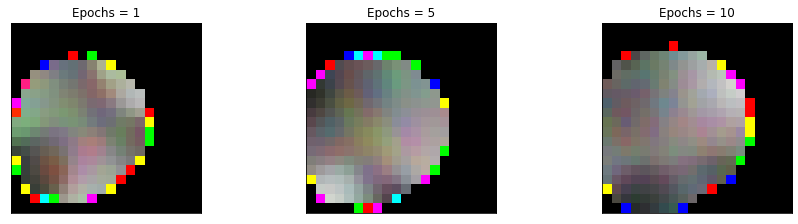

In [90]:
fig, ax = plt.subplots(
    nrows=1, ncols=3, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))

epochs = [1,5,10]

for ind,t in enumerate(epochs):
    #---------------------------------------------------
    SOM_train = entrenar_SOM(SOM=SOM,train_data=train_data,epochs=t)
    #---------------------------------------------------
    ax[ind].imshow(SOM_train.astype(int))
    ax[ind].title.set_text('Epochs = ' + str(t))

## Ejercicio 5. Estudiar cómo afectan los parámetros al SOM. 

5.1 Entrena el SOM cambiando el `learn_rate = [0.001, 0.5, 0.99]` y el `radius_sq = [0.01, 1, 10]` y representa el resultado. Número de épocas = 5.

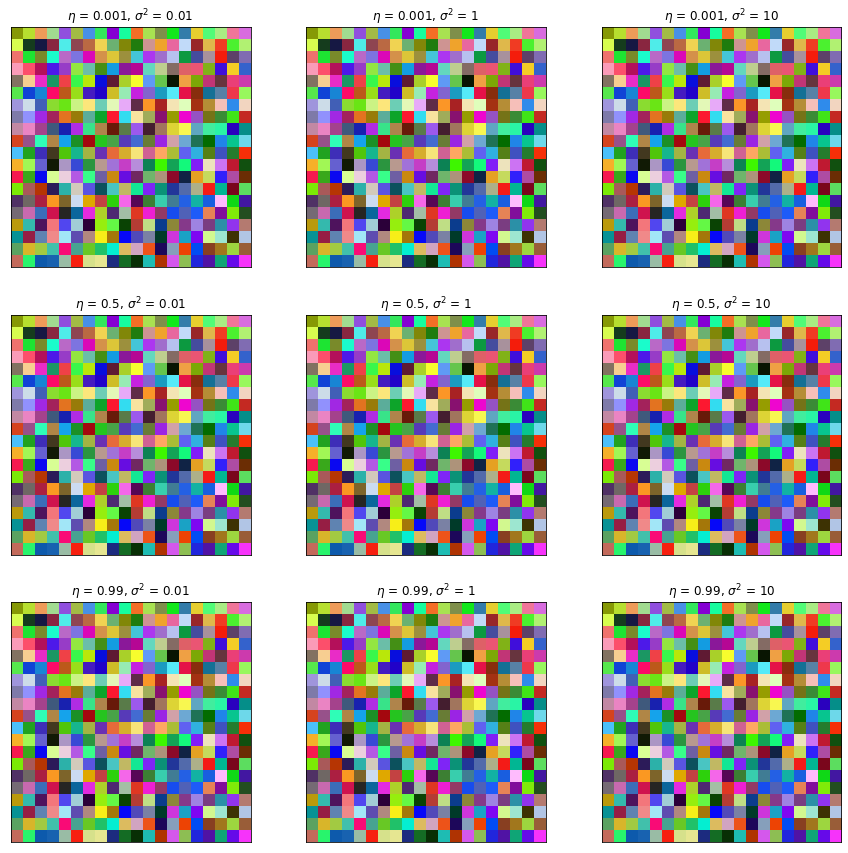

In [27]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15), 
    subplot_kw=dict(xticks=[], yticks=[]))

# Inicializa el SOM de manera aleatoria pero siempre en el mismo estado

for i,learn_rate in enumerate([0.001, 0.5, 0.99]):
    for j,radius_sq in enumerate([0.01, 1, 10]):
        #---------------------------------------------------------

        
        
        
        #---------------------------------------------------------
        ax[i][j].imshow(SOM.astype(int))
        ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) + 
                                ', $\sigma^2$ = ' + str(radius_sq))

5.2 ¿Qué ocurre? ¿Cuál sería la mejor combinación de parámetros y por qué?
#### Respuesta: